데이터수집및분석<br>
소프트웨어응용학부 202004063 서준하

# 1. 주제 및 데이터 소개

주제: **한강공원 주차장 월평균 주차대수와 월별 국제 원유 가격의 상관관계**

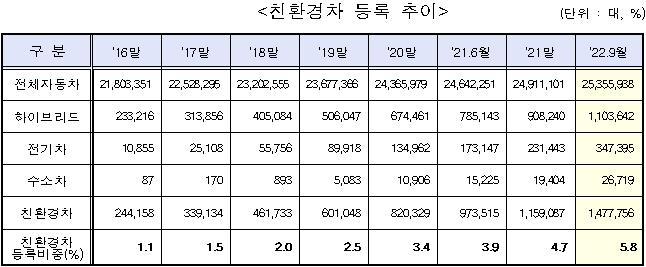

최근 국토교통부의 친환경차(전기·수소·하이브리드) 관련 보도자료에 따르면 전체자동차 중 친환경차 등록비중은 5.8%.

휘발유차와 경유차가 많은 비중을 차지하고 있어 국제 원유 가격이 높을수록 여가 시 자동차 운행이 감소할 거로 보고 주제의 두 데이터가 음의 상관관계를 가질 거로 예측함. 

프로젝트에 사용한 데이터
- 한국석유공사 페트로넷의 월별 국제 원유 가격
- 서울 열린데이터 광장의 한강공원 주차장 이용 현황

두 데이터의 조사 기간
- 2020년 1월 ~ 2023년 4월, 총 40개월

# 2. 분석 과정 및 결과

## 폰트 설치, 모듈 임포트
font install, module import

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumGothic')

## 파일 불러오기

In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/oil202304.csv')
df1 = df1.drop('유종', axis=1)
df2 = pd.read_csv('/content/parking202304.csv', encoding='EUC-KR')

In [ ]:
df1.head()

,월,Dubai
0,20년 01월,64.32
1,02월,54.23
2,03월,33.71
3,04월,20.39
4,05월,30.47


In [ ]:
df2.head()

,지구별,주차장명,주차대수,이용시간,날짜
0,PLT-009,반포1주차장,33103,1823259,2023/04
1,PLT-007,"양화3,4,5주차장",31778,2751544,2023/04
2,PLT-007,양화1주차장,9910,945881,2023/04
3,PLT-004,이촌1주차장,3370,323904,2023/04
4,PLT-011,잠실4주차장,70677,4308461,2023/04


## 월별 평균 주차대수 계산

In [ ]:
parking_avg = [] # 월별 평균 주차대수가 정리될 배열
month_tmp = [] # 같은 월(yyyy/mm)의 주차대수 정보를 임시로 저장하는 배열

y = 2023
m = 4
date = [] # '2023/04'부터 '2020/01'까지의 날짜가 들어갈 배열

for h in range(40) : # '2023/04'부터 '2020/01'까지의 날짜가 date에 들어가도록 반복
  if m == 0 :
    y -= 1
    m = 12
  date.append(str(y) + '/' + str('%0.2d' %m))
  m -= 1

d_idx = 0 # 월 배열의 기본값(2023/04)

for i in range(len(df2['날짜'])) :  # 날짜 열의 행 개수 만큼 반복
  if df2['날짜'][i] == date[d_idx] :  # 반복 중 행의 월(yyyy/mm)이 바뀌는지 검사
    month_tmp.append(df2['주차대수'][i]) # 바뀌지 않으면 주차대수 값 임시 저장
  else : # 반복 중 행의 월(yyyy/mm)이 바뀔 때
    d_idx += 1 # 월 변경
    parking_avg.append(sum(month_tmp) / len(month_tmp)) # 임시 저장된 값 평균 계산
    month_tmp.clear() # 임시 저장된 값 삭제
    month_tmp.append(df2['주차대수'][i]) # 월 변경 후 맨 첫 주차대수 값 임시 저장
parking_avg.append(sum(month_tmp) / len(month_tmp)) # 반복 후 마지막 월 평균 계산

parking_avg.reverse() # 날짜 오름차순으로 정리
df21 = pd.DataFrame(parking_avg) # 유가 데이터와 합치기 위한 데이터프레임으로 저장

## 유가 데이터, 주차대수 데이터 합치기

In [ ]:
df0 = pd.merge(df1, df21, left_index=True, right_index=True)

In [ ]:
df0.head()

,월,Dubai,0
0,20년 01월,64.32,6130.583333
1,02월,54.23,16098.680000
2,03월,33.71,33997.760000
3,04월,20.39,33245.120000
4,05월,30.47,40062.200000


## 그래프 x축 눈금 수정
- 연도 표기 없는 월의 데이터 중복 방지 

In [ ]:
months = df0['월'].tolist()
for i in range(40) :
  months[i] = months[i].replace(u'\xa0', u' ') # 인코딩 문제로 인한 특수문자 제거
print(months)
y = ''
for j in range(40) :
  if months[j][0] == '2' :
    y = months[j][0:4]
  else :
    months[j] = y + months[j]
print(months)

['20년 01월', '02월', '03월', '04월', '05월', '06월', '07월', '08월', '09월', '10월', '11월', '12월', '21년 01월', '02월', '03월', '04월', '05월', '06월', '07월', '08월', '09월', '10월', '11월', '12월', '22년 01월', '02월', '03월', '04월', '05월', '06월', '07월', '08월', '09월', '10월', '11월', '12월', '23년 01월', '02월', '03월', '04월']
['20년 01월', '20년 02월', '20년 03월', '20년 04월', '20년 05월', '20년 06월', '20년 07월', '20년 08월', '20년 09월', '20년 10월', '20년 11월', '20년 12월', '21년 01월', '21년 02월', '21년 03월', '21년 04월', '21년 05월', '21년 06월', '21년 07월', '21년 08월', '21년 09월', '21년 10월', '21년 11월', '21년 12월', '22년 01월', '22년 02월', '22년 03월', '22년 04월', '22년 05월', '22년 06월', '22년 07월', '22년 08월', '22년 09월', '22년 10월', '22년 11월', '22년 12월', '23년 01월', '23년 02월', '23년 03월', '23년 04월']


## 월별 유가, 월별 주차대수 그래프 출력

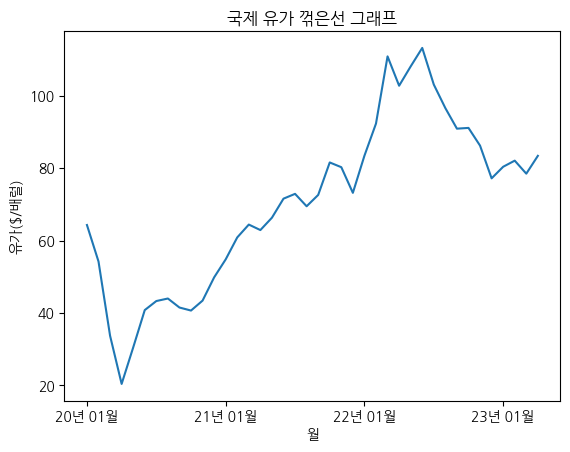

In [ ]:
plt.plot(months, df0['Dubai']) # 유가

plt.title('국제 유가 꺾은선 그래프')

plt.xlabel('월')
plt.ylabel('유가($/배럴)')

plt.xticks(['20년 01월', '21년 01월', '22년 01월', '23년 01월'])

plt.show()

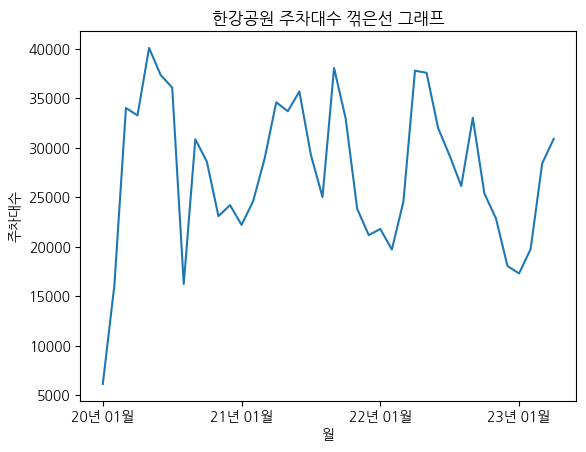

In [ ]:
plt.plot(months, df0[0]) # 주차대수

plt.title('한강공원 주차대수 꺾은선 그래프')

plt.xlabel('월')
plt.ylabel('주차대수')

plt.xticks(['20년 01월', '21년 01월', '22년 01월', '23년 01월'])

plt.show()

## 두 그래프 합치기

<ipython-input-75-590787dbbb3f>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
<ipython-input-75-590787dbbb3f>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


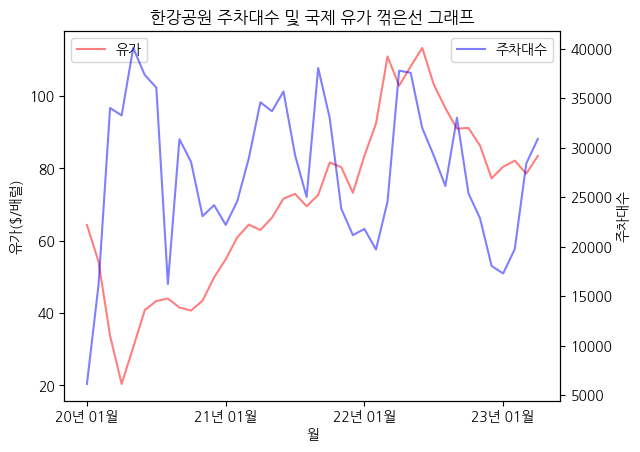

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(months, df0['Dubai'], color = 'red', alpha = 0.5, label = '유가')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

ax2 = ax1.twinx()
ax2.plot(months, df0[0], color = 'blue', alpha = 0.5, label = '주차대수')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.title('한강공원 주차대수 및 국제 유가 꺾은선 그래프')

ax1.set_xlabel('월')
ax1.set_ylabel('유가($/배럴)')
ax2.set_ylabel('주차대수')

plt.xticks(['20년 01월', '21년 01월', '22년 01월', '23년 01월'])

ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')

plt.show()

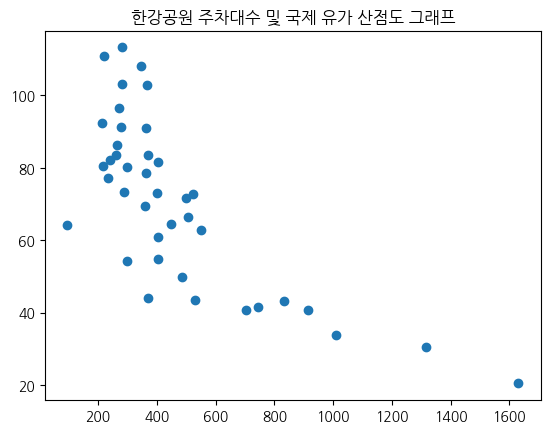

In [ ]:
plt.scatter((df0[0] / df0['Dubai']), df0['Dubai'])
plt.title('한강공원 주차대수 및 국제 유가 산점도 그래프')
plt.show()

# 3. 시사점 도출

한강공원 주차장 월평균 주차대수와 월별 국제 원유 가격의 상관관계를 두 가지 그래프로 확인함.
- 꺾은선 그래프
- 산점도 그래프

두 그래프 모두 두 데이터가 **대체로 음의 상관관계를 띠는 경향**을 보임.

이상적인 음의 상관관계에 영향을 주는 요소
- 2020년 초 코로나19 확산
 - 대중교통의 이용이 감소하여 자가용의 운행이 증가할 수 있는 점
 - 여가 장소로서의 한강공원 이용이 감소할 수 있는 점
- 조사 기간 전기차 등 친환경차의 등록 증가